In [14]:

import itertools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [15]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Preprocessing


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset.drop('Outcome', axis = 1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Training the Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Making the prediction

In [22]:
y_pred = logistic_regression.predict(X_test)
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
149,1
150,0
151,0
152,0


## Ecaluation metrics

### Accuracy 

In [23]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7532467532467533


## Accuracy Paradox 

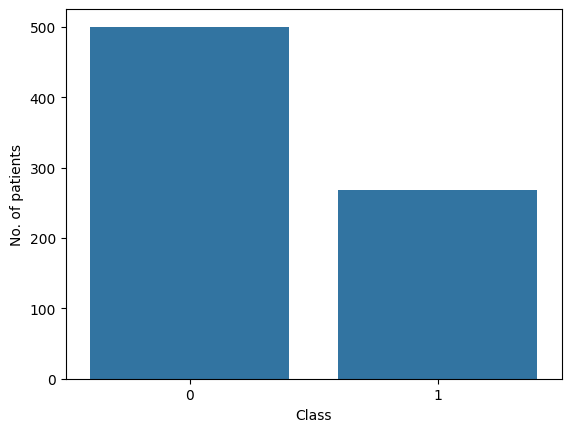

In [25]:
sns.countplot(x ='Outcome', data = dataset)
plt.xlabel("Class")
plt.ylabel("No. of patients")
plt.show()

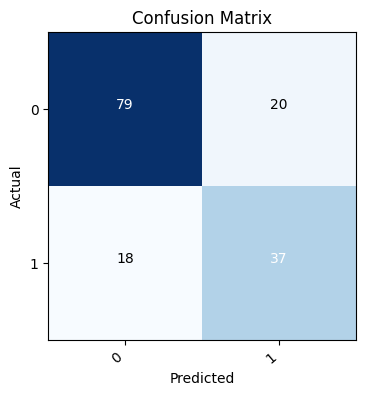

In [26]:
# Import confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

labels = y_test.unique()
matrix = confusion_matrix(y_test, y_pred, labels=labels, normalize=None)

fig,ax = plt.subplots(figsize=(12,4))
ax.imshow(matrix, cmap="Blues")
t_hold = (matrix.max() - matrix.min()) / 2.
for row,col in itertools.product(range(len(labels)), range(len(labels))):
    color = "white" if matrix[row,col] > t_hold else "black"
    ax.text(col, row, matrix[row, col], horizontalalignment="center", color=color)
tick_marks = np.arange(len(labels))
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=40, ha="right")
ax.set_ylabel("Actual")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
plt.show()

### also trying  Plot_confusiom_matrics from sklearn.metric

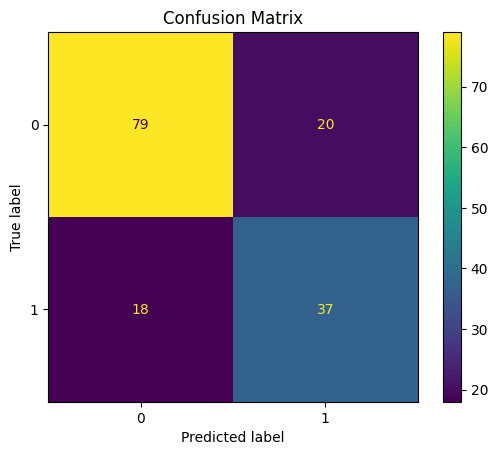

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay



# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test)

plt.title("Confusion Matrix")
plt.show()


### Precision score

In [29]:
from sklearn.metrics import precision_score

p_score = precision_score(y_test, y_pred)

print(p_score)

0.6491228070175439


### Recall score

In [31]:
from sklearn.metrics import recall_score
r_score = recall_score(y_test, y_pred)
print(r_score)

0.6727272727272727


### f1 score 

In [32]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f1)

0.6607142857142857
